In [1]:
import numpy as np
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
import miceforest as mf
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# fetch dataset 
pedestrians_in_traffic = fetch_ucirepo(id=536)  
# data (as pandas dataframes) 
x = pedestrians_in_traffic.data.features 
y = pedestrians_in_traffic.data.targets 

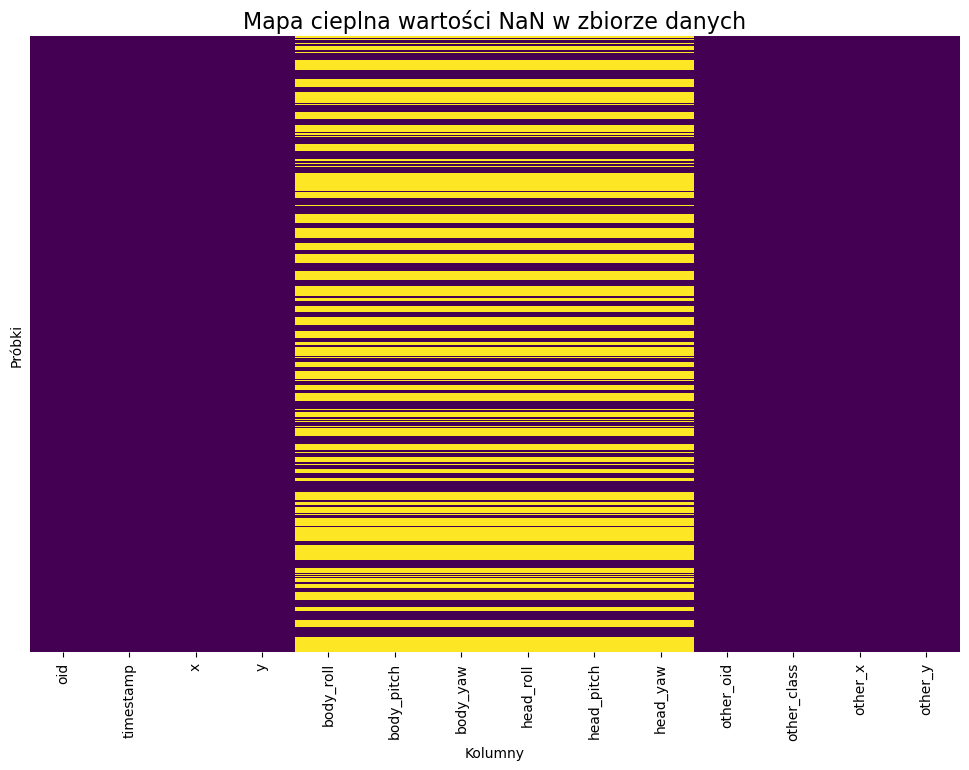

In [3]:
# Tworzenie mapy cieplnej brakujących wartości
plt.figure(figsize=(12, 8))
sns.heatmap(x.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa cieplna wartości NaN w zbiorze danych", fontsize=16)
plt.xlabel("Kolumny")
plt.ylabel("Próbki")
plt.show()

In [3]:
# Połączenie X i y w jeden DataFrame
data = pd.concat([x, y], axis=1)

In [4]:
data.select_dtypes("object").head() # sprawdzam czy występują dane tekstowe lub mieszane

,other_oid,other_class,other_x,other_y
0,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [5]:
data.drop(["other_oid", "other_class", "other_x", "other_y"], axis=1, inplace=True) 

In [6]:
data.drop(["oid"], axis=1, inplace=True) 

In [7]:
data

,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN
1,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN
2,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN
3,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN
4,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4754,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN
4755,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN
4756,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN
4757,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# podsumowanie brakujących wartości
missing_summary = (
    data.isnull().sum()
    .to_frame(name='Missing Values')
    .reset_index()
    .rename(columns={'index': 'Column'})
)
missing_summary

,Column,Missing Values
0,timestamp,0
1,x,0
2,y,0
3,body_roll,2698
4,body_pitch,2698
5,body_yaw,2698
6,head_roll,2698
7,head_pitch,2698
8,head_yaw,2698


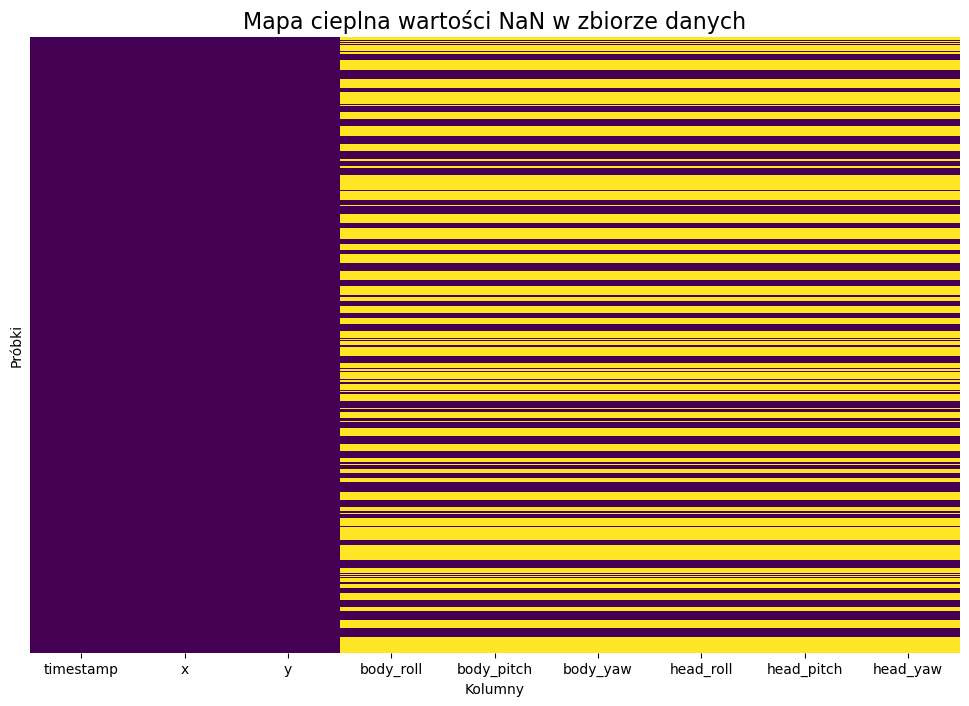

In [11]:
# Tworzenie mapy cieplnej brakujących wartości
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa cieplna wartości NaN w zbiorze danych", fontsize=16)
plt.xlabel("Kolumny")
plt.ylabel("Próbki")
plt.show()

In [9]:
data.head()

,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN
1,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN
2,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN
3,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN
4,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# podsumowanie brakujących wartości
missing_summary = (
    data.isnull().sum()
    .to_frame(name='Missing Values')
    .reset_index()
    .rename(columns={'index': 'Column'})
)
missing_summary

,Column,Missing Values
0,timestamp,0
1,x,0
2,y,0
3,body_roll,2698
4,body_pitch,2698
5,body_yaw,2698
6,head_roll,2698
7,head_pitch,2698
8,head_yaw,2698


In [11]:
y=data['timestamp']
x=data.drop('timestamp',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42,shuffle=True)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42,shuffle=True)

In [13]:
# Imputacja braków metodą wypełniania zerami
imp_zero = SimpleImputer(strategy='constant', fill_value=0)
x_train_imputed = imp_zero.fit_transform(x_train)
x_test_imputed = imp_zero.transform(x_test)

In [14]:
# Skalowanie danych
scaler = StandardScaler()
scaler.fit(x_train_imputed)
# Przekształcenie danych do DataFrame z odpowiednimi nazwami kolumn
x_train_imputed = pd.DataFrame(scaler.transform(x_train_imputed), columns=x_train.columns, index=x_train.index)
x_test_imputed = pd.DataFrame(scaler.transform(x_test_imputed), columns=x_test.columns, index=x_test.index)

In [15]:
models={'Linear Regression':LinearRegression(),
           'Decision Tree':DecisionTreeRegressor(),
           'Random Forest':RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42),
            'Gradient Boosting':GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)}

In [16]:
# iteracja po każdym modelu
for name, model in models.items():
    # irenowanie modelu na danych treningowych
    model.fit(x_train_imputed, y_train)
    
    # predykcja na zbiorze testowym
    y_pred = model.predict(x_test_imputed)
    
    # obliczanie metryk
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # wyświetlenie wyników dla aktualnego modelu
    print(f"Model: {name}")
    print("MSE: {:.2f}".format(mse))
    print("MAE: {:.2f}".format(mae))
    print("RMSE: {:.2f}".format(rmse))
    print("R²: {:.2f}".format(r2))
    print("-" * 30)

Model: Linear Regression
MSE: 578168.20
MAE: 653.60
RMSE: 760.37
R²: 0.11
------------------------------
Model: Decision Tree
MSE: 24337.85
MAE: 28.67
RMSE: 156.01
R²: 0.96
------------------------------
Model: Random Forest
MSE: 242813.30
MAE: 391.82
RMSE: 492.76
R²: 0.63
------------------------------
Model: Gradient Boosting
MSE: 45232.18
MAE: 152.96
RMSE: 212.68
R²: 0.93
------------------------------


In [17]:
# Imputacja braków metodą wypełniania medianą
imp_median = SimpleImputer(strategy='median')
x_train_imputed = imp_median.fit_transform(x_train)
x_test_imputed = imp_median.transform(x_test)

In [18]:
# Skalowanie danych
scaler = StandardScaler()
scaler.fit(x_train_imputed)
# Przekształcenie danych do DataFrame z odpowiednimi nazwami kolumn
x_train_imputed = pd.DataFrame(scaler.transform(x_train_imputed), columns=x_train.columns, index=x_train.index)
x_test_imputed = pd.DataFrame(scaler.transform(x_test_imputed), columns=x_test.columns, index=x_test.index)

In [19]:
# iteracja po każdym modelu
for name, model in models.items():
    # irenowanie modelu na danych treningowych
    model.fit(x_train_imputed, y_train)
    
    # predykcja na zbiorze testowym
    y_pred = model.predict(x_test_imputed)
    
    # obliczanie metryk
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # wyświetlenie wyników dla aktualnego modelu
    print(f"Model: {name}")
    print("MSE: {:.2f}".format(mse))
    print("MAE: {:.2f}".format(mae))
    print("RMSE: {:.2f}".format(rmse))
    print("R²: {:.2f}".format(r2))
    print("-" * 30)

Model: Linear Regression
MSE: 573319.10
MAE: 649.57
RMSE: 757.18
R²: 0.12
------------------------------
Model: Decision Tree
MSE: 21993.28
MAE: 23.40
RMSE: 148.30
R²: 0.97
------------------------------
Model: Random Forest
MSE: 242798.64
MAE: 391.78
RMSE: 492.75
R²: 0.63
------------------------------
Model: Gradient Boosting
MSE: 46158.04
MAE: 156.83
RMSE: 214.84
R²: 0.93
------------------------------


In [20]:

def multiple_imputation_mice(train, test, num_imputations=3):
    train_imputed_datasets = []
    test_imputed_datasets = []

    for i in range(num_imputations):

        mice_imputer = IterativeImputer(random_state=i, max_iter=10, sample_posterior=True)

        # Imputacja dla zbioru treningowego
        imputed_train = pd.DataFrame(mice_imputer.fit_transform(train), columns=train.columns)
        train_imputed_datasets.append(imputed_train)

        # Imputacja dla zbioru testowego
        imputed_test = pd.DataFrame(mice_imputer.transform(test), columns=test.columns)
        test_imputed_datasets.append(imputed_test)

    # agregacja wyników imputacji
    aggregated_train = pd.concat(train_imputed_datasets).groupby(level=0).mean()
    aggregated_test = pd.concat(test_imputed_datasets).groupby(level=0).mean()

    return aggregated_train, aggregated_test

aggregated_train, aggregated_test = multiple_imputation_mice(x_train, x_test, num_imputations=3)

In [21]:
# Skalowanie danych
scaler = StandardScaler()
scaler.fit(aggregated_train)
# Przekształcenie danych do DataFrame z odpowiednimi nazwami kolumn
aggregated_train_scaled = pd.DataFrame(scaler.transform(aggregated_train), columns=aggregated_train.columns, index=aggregated_train.index)
aggregated_test_scaled = pd.DataFrame(scaler.transform(aggregated_test), columns=aggregated_test.columns, index=aggregated_test.index)

In [22]:
# iteracja po każdym modelu
for name, model in models.items():
    # irenowanie modelu na danych treningowych
    model.fit(x_train_imputed, y_train)
    
    # predykcja na zbiorze testowym
    y_pred = model.predict(x_test_imputed)
    
    # obliczanie metryk
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # wyświetlenie wyników dla aktualnego modelu
    print(f"Model: {name}")
    print("MSE: {:.2f}".format(mse))
    print("MAE: {:.2f}".format(mae))
    print("RMSE: {:.2f}".format(rmse))
    print("R²: {:.2f}".format(r2))
    print("-" * 30)

Model: Linear Regression
MSE: 573319.10
MAE: 649.57
RMSE: 757.18
R²: 0.12
------------------------------
Model: Decision Tree
MSE: 22267.87
MAE: 23.73
RMSE: 149.22
R²: 0.97
------------------------------
Model: Random Forest
MSE: 242798.64
MAE: 391.78
RMSE: 492.75
R²: 0.63
------------------------------
Model: Gradient Boosting
MSE: 46158.04
MAE: 156.83
RMSE: 214.84
R²: 0.93
------------------------------


In [23]:
# Imputacja braków metodą wypełniania knn
imp_knn = KNNImputer(n_neighbors=3)
x_train_imputed = imp_knn.fit_transform(x_train)
x_test_imputed = imp_knn.transform(x_test)

In [24]:
# Skalowanie danych
scaler = StandardScaler()
scaler.fit(x_train_imputed)
# Przekształcenie danych do DataFrame z odpowiednimi nazwami kolumn
x_train_imputed = pd.DataFrame(scaler.transform(x_train_imputed), columns=x_train.columns, index=x_train.index)
x_test_imputed = pd.DataFrame(scaler.transform(x_test_imputed), columns=x_test.columns, index=x_test.index)

In [25]:
# iteracja po każdym modelu
for name, model in models.items():
    # irenowanie modelu na danych treningowych
    model.fit(x_train_imputed, y_train)
    
    # predykcja na zbiorze testowym
    y_pred = model.predict(x_test_imputed)
    
    # obliczanie metryk
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # wyświetlenie wyników dla aktualnego modelu
    print(f"Model: {name}")
    print("MSE: {:.2f}".format(mse))
    print("MAE: {:.2f}".format(mae))
    print("RMSE: {:.2f}".format(rmse))
    print("R²: {:.2f}".format(r2))
    print("-" * 30)

Model: Linear Regression
MSE: 522137.63
MAE: 602.98
RMSE: 722.59
R²: 0.20
------------------------------
Model: Decision Tree
MSE: 32596.16
MAE: 36.41
RMSE: 180.54
R²: 0.95
------------------------------
Model: Random Forest
MSE: 239175.18
MAE: 382.29
RMSE: 489.06
R²: 0.63
------------------------------
Model: Gradient Boosting
MSE: 49763.08
MAE: 155.73
RMSE: 223.08
R²: 0.92
------------------------------


In [26]:
# Funkcja imputacji LightGBM
def lightgbm_imputation_train_test(x_train, x_test):
    x_train = x_train.copy()
    x_test = x_test.copy()
    
    for column in x_train.columns:
        missing_train = x_train[column].isnull()
        missing_test = x_test[column].isnull()
        
        if missing_train.any() or missing_test.any():
            # Przygotowanie danych do modelu
            x_train_features = x_train.loc[~missing_train].drop(columns=column)
            y_train = x_train.loc[~missing_train, column]
            
            x_test_features = x_test.drop(columns=column)
            
            # LightGBM - imputacja na zbiorze treningowym
            model = LGBMRegressor(random_state=42)
            model.fit(x_train_features, y_train)
            
            # Imputacja braków w zbiorze treningowym
            if missing_train.any():
                x_train.loc[missing_train, column] = model.predict(x_train.loc[missing_train].drop(columns=column))
            
            # Imputacja braków w zbiorze testowym
            if missing_test.any():
                x_test.loc[missing_test, column] = model.predict(x_test_features.loc[missing_test])
    
    return x_train, x_test

x_train_imputed, x_test_imputed = lightgbm_imputation_train_test(x_train, x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1499
[LightGBM] [Info] Number of data points in the train set: 1445, number of used features: 7
[LightGBM] [Info] Start training from score 0.231306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1483
[LightGBM] [Info] Number of data points in the train set: 1445, number of used features: 7
[LightGBM] [Info] Start training from score -0.698097
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 1

In [27]:
# Skalowanie danych
scaler = StandardScaler()
scaler.fit(x_train_imputed)
# Przekształcenie danych do DataFrame z odpowiednimi nazwami kolumn
x_train_imputed = pd.DataFrame(scaler.transform(x_train_imputed), columns=x_train.columns, index=x_train.index)
x_test_imputed = pd.DataFrame(scaler.transform(x_test_imputed), columns=x_test.columns, index=x_test.index)

In [28]:
# iteracja po każdym modelu
for name, model in models.items():
    # irenowanie modelu na danych treningowych
    model.fit(x_train_imputed, y_train)
    
    # predykcja na zbiorze testowym
    y_pred = model.predict(x_test_imputed)
    
    # obliczanie metryk
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # wyświetlenie wyników dla aktualnego modelu
    print(f"Model: {name}")
    print("MSE: {:.2f}".format(mse))
    print("MAE: {:.2f}".format(mae))
    print("RMSE: {:.2f}".format(rmse))
    print("R²: {:.2f}".format(r2))
    print("-" * 30)

Model: Linear Regression
MSE: 574084.56
MAE: 649.70
RMSE: 757.68
R²: 0.12
------------------------------
Model: Decision Tree
MSE: 31994.53
MAE: 32.26
RMSE: 178.87
R²: 0.95
------------------------------
Model: Random Forest
MSE: 242018.24
MAE: 391.55
RMSE: 491.95
R²: 0.63
------------------------------
Model: Gradient Boosting
MSE: 45820.18
MAE: 150.91
RMSE: 214.06
R²: 0.93
------------------------------


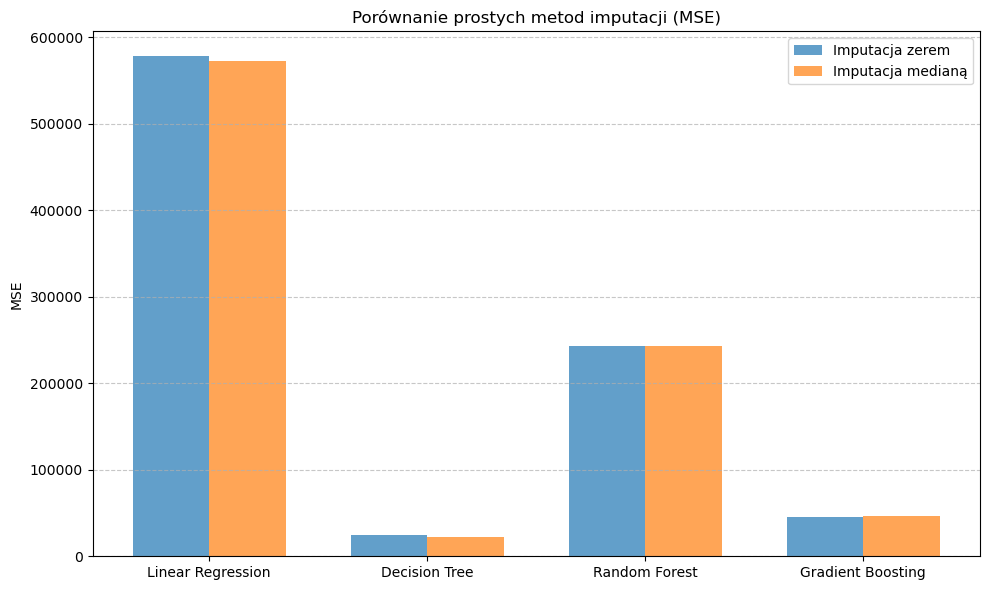

In [31]:
import matplotlib.pyplot as plt
import numpy as np
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mse_zero = [578168.20, 24377.85, 242813.30, 45232.18]
mse_median = [573319.10, 21993.28, 242798.64, 46158.04]
x = np.arange(len(models)) 
width = 0.35 
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mse_zero, width, label='Imputacja zerem', alpha=0.7)
plt.bar(x + width/2, mse_median, width, label='Imputacja medianą', alpha=0.7)
plt.ylabel('MSE')
plt.title('Porównanie prostych metod imputacji (MSE)')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

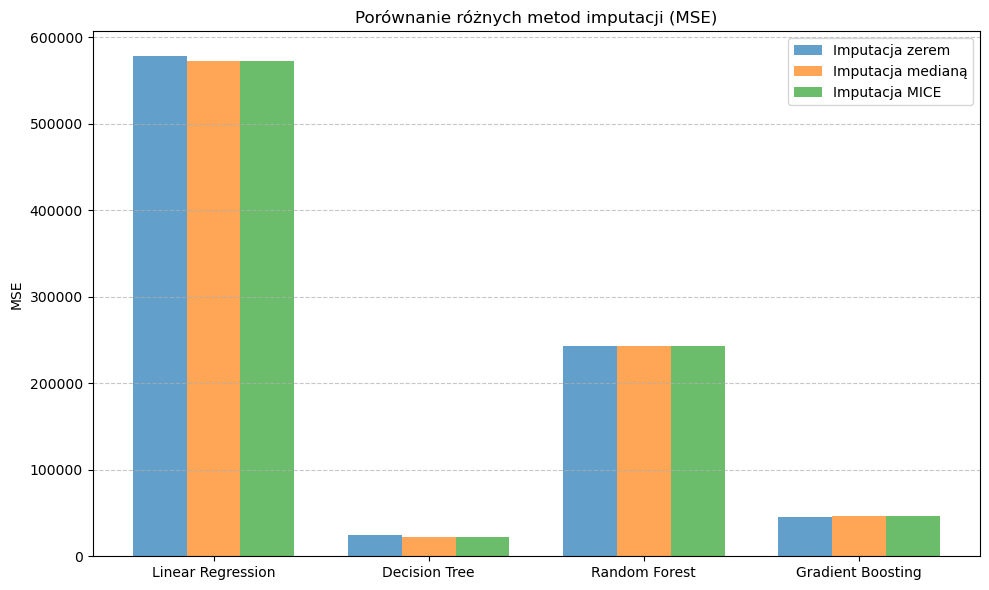

In [36]:
import matplotlib.pyplot as plt
import numpy as np
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mse_zero = [578168.20, 24377.85, 242813.30, 45232.18]
mse_median = [573319.10, 21993.28, 242798.64, 46158.04]
mse_mice = [573319.10, 22267.87, 242798.64, 46158.04]
x = np.arange(len(models))  
width = 0.25              
plt.figure(figsize=(10, 6))
plt.bar(x - width, mse_zero, width, label='Imputacja zerem', alpha=0.7)
plt.bar(x, mse_median, width, label='Imputacja medianą', alpha=0.7)
plt.bar(x + width, mse_mice, width, label='Imputacja MICE', alpha=0.7)
plt.ylabel('MSE')
plt.title('Porównanie różnych metod imputacji (MSE)')
plt.xticks(x, models) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
data = {
    "method": [
        "zero", "zero", "zero", "zero",
        "mediana", "mediana", "mediana", "mediana",
        "MICE", "MICE", "MICE", "MICE",
        "KNN", "KNN", "KNN", "KNN",
        "LightGBM", "LightGBM", "LightGBM", "LightGBM"
    ],
    "model": [
        "LR", "DT", "RF", "GB",
        "LR", "DT", "RF", "GB",
        "LR", "DT", "RF", "GB",
        "LR", "DT", "RF", "GB",
        "LR", "DT", "RF", "GB"
    ],
    "R2": [
        0.11, 0.96, 0.63, 0.93,
        0.12, 0.97, 0.63, 0.93,
        0.12, 0.97, 0.63, 0.93,
        0.20, 0.95, 0.63, 0.92,
        0.12, 0.95, 0.63, 0.93
    ],
    "MSE": [
        578168, 24377, 242813, 45232,
        573319, 21993, 242798, 46158,
        573319, 22267, 242798, 46158,
        522137, 3259616, 239175, 49763,
        574084, 31994, 242018, 45820
    ]
}

df = pd.DataFrame(data)
print(df)


      method model    R2      MSE
0       zero    LR  0.11   578168
1       zero    DT  0.96    24377
2       zero    RF  0.63   242813
3       zero    GB  0.93    45232
4    mediana    LR  0.12   573319
5    mediana    DT  0.97    21993
6    mediana    RF  0.63   242798
7    mediana    GB  0.93    46158
8       MICE    LR  0.12   573319
9       MICE    DT  0.97    22267
10      MICE    RF  0.63   242798
11      MICE    GB  0.93    46158
12       KNN    LR  0.20   522137
13       KNN    DT  0.95  3259616
14       KNN    RF  0.63   239175
15       KNN    GB  0.92    49763
16  LightGBM    LR  0.12   574084
17  LightGBM    DT  0.95    31994
18  LightGBM    RF  0.63   242018
19  LightGBM    GB  0.93    45820


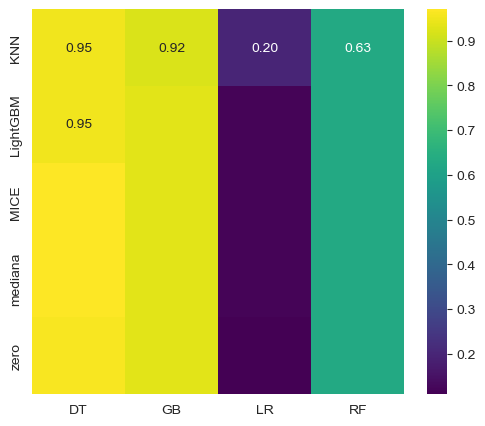

In [38]:
df_pivot_r2 = df.pivot(index="method", columns="model", values="R2")
plt.figure(figsize=(6, 5))
sns.heatmap(df_pivot_r2, annot=True, cmap="viridis", fmt=".2f")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

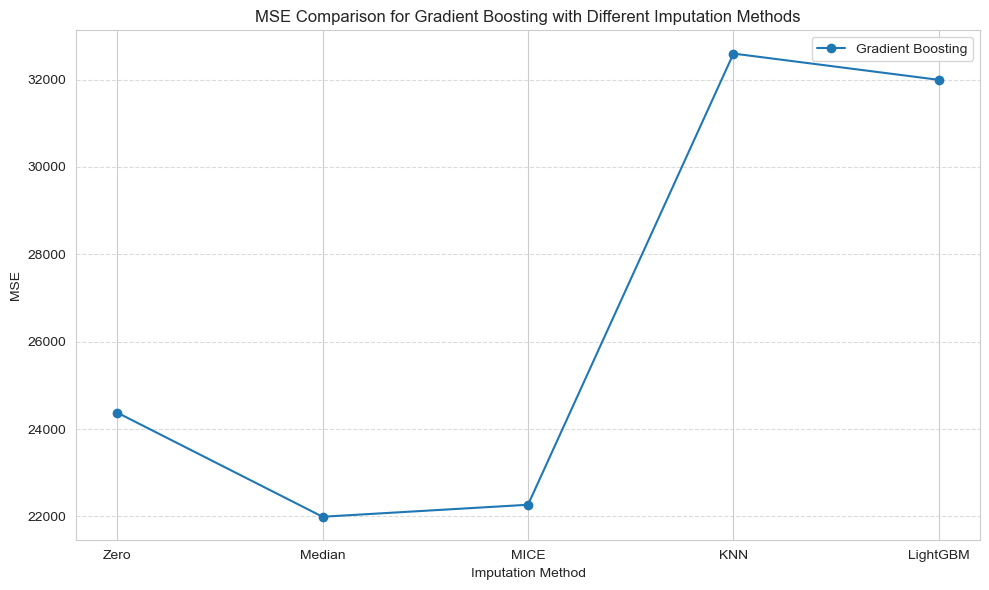

In [40]:
mse_methods = [24377.85, 21993.28, 22267.87, 32596.16, 31994.53]
methods = ['Zero', 'Median', 'MICE', 'KNN', 'LightGBM']
plt.figure(figsize=(10, 6))
plt.plot(methods, mse_methods, marker='o', linestyle='-', label='Gradient Boosting')
plt.ylabel('MSE')
plt.xlabel('Imputation Method')
plt.title('MSE Comparison for Gradient Boosting with Different Imputation Methods')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()